# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [23]:
#kmr weatherpy workbook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [24]:
# Test to determine if the API key and url are working before gettign too far down the road
# Build query URL and request your results in Celsius
url = "http://api.openweathermap.org/data/2.5/weather?"
town = "Burundi"
# Get weather data
xquery_url = url + "appid=" + api_key + "&q=" + town
# Get temperature from JSON response
weather_response = requests.get(xquery_url).json()
weather_json = weather_response['main']['temp']
# Report temperature
print(f"The weather API responded with: {weather_json}.")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

The weather API responded with: 291.08.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


## Generate Cities List

In [25]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#len(cities)
fullset = len(cities)
print("The number of randomly generated cities in the project scope")
print(fullset)
#print(cities)

The number of randomly generated cities in the project scope
639


In [26]:
# Build a data frame to capture each cities weather information
cities_df = {
    "City": cities,
}
cities_df = pd.DataFrame(cities_df)
print("Exhibit 1a: Cities in the project with a place to capture weather data")

# set up additional columns to hold information
cities_df['Lat'] = 0
cities_df['Lng'] = 0
cities_df['Temp Max'] = 0
cities_df['Humidity'] = 0
cities_df['Cloudiness'] = 0
cities_df['Wind Speed'] = 0
cities_df['Country'] = ""
cities_df['Date'] = ""
cities_df.head()

Exhibit 1a: Cities in the project with a place to capture weather data


,City,Lat,Lng,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date
0,kodiak,0,0,0,0,0,0,,
1,omboue,0,0,0,0,0,0,,
2,kapaa,0,0,0,0,0,0,,
3,beloha,0,0,0,0,0,0,,
4,kavieng,0,0,0,0,0,0,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [27]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

counter = 0

# Loop through the list of cities and perform a request for data on each
print("Checkpoint: Confirmation listing of cities processed through OpenWeather Site")

for index, row in cities_df.iterrows():
    cityname = row['City']
    counter = counter + 1
    
    if counter >= 61:
        print("**Done running the first batch**")
        break
    
    if counter <= 60:
        time.sleep(1)
        print(f"Processing Record {counter} of {fullset}. City = {cityname}")
        
        try:
            response = requests.get(query_url + cityname).json()   
            cities_df.loc[index, 'Lat'] = response['coord']['lat']
            cities_df.loc[index, 'Lng'] = response['coord']['lon']
            cities_df.loc[index, 'Temp Max'] = response['main']['temp_max']
            cities_df.loc[index, 'Humidity'] = response['main']['humidity']
            cities_df.loc[index, 'Cloudiness'] = response['clouds']['all']
            cities_df.loc[index, 'Wind Speed'] = response['wind']['speed']
            cities_df.loc[index, 'Country'] = response['sys']['country']
            cities_df.loc[index, 'Date'] = response['dt']
         
        except (KeyError, IndexError, ValueError):
            print(f"... skipped over  " + cityname + "  because it lacked sufficient information")
            #cities_df.remove(cityname) ... doesn't work here
            pass

# First attempt structure going to lists instead of dataframes
# Create lists to capture date for use in data frame
#cities = ['London', 'xxToronto','nanortalik', 'haines junction', 'ancud', 'mikkeli', 'daru', 'vaini', 'bethel', 'vostok']
#cities = cities
# lat = []
# lng = []
# temp_max = []
# humidity = []
# cloudiness = []
# wind_speed = []
# country = []
# date = []
#for city in cities:
#             lat.append(response['coord']['lat'])
#             lng.append(response['coord']['lon'])
#             temp_max.append(response['main']['temp_max'])
#             humidity.append(response['main']['humidity'])
#             cloudiness.append(response['clouds']['all'])
#             wind_speed.append(response['wind']['speed'])
#             country.append(response['sys']['country'])
#             date.append(response['dt'])


Checkpoint: Confirmation listing of cities processed through OpenWeather Site
Processing Record 1 of 639. City = kodiak
Processing Record 2 of 639. City = omboue
Processing Record 3 of 639. City = kapaa
Processing Record 4 of 639. City = beloha
Processing Record 5 of 639. City = kavieng
Processing Record 6 of 639. City = orchard homes
Processing Record 7 of 639. City = ushuaia
Processing Record 8 of 639. City = saskylakh
Processing Record 9 of 639. City = yellowknife
Processing Record 10 of 639. City = hilo
Processing Record 11 of 639. City = cape town
Processing Record 12 of 639. City = punta arenas
Processing Record 13 of 639. City = airai
Processing Record 14 of 639. City = padang
Processing Record 15 of 639. City = bambous virieux
Processing Record 16 of 639. City = nome
Processing Record 17 of 639. City = busselton
Processing Record 18 of 639. City = puerto ayora
Processing Record 19 of 639. City = sarangani
Processing Record 20 of 639. City = klaksvik
Processing Record 21 of 639.

In [29]:
# Provide a review list of all cities checked for weather data
cities_df = cities_df.dropna(how='any')
print("Exhibit 1b: Cities with their available weather data")
cities_df.to_csv("output_data/1bex_citiespostapicall.csv", index=False, header=True)
cities_df.head()

Exhibit 1b: Cities with their available weather data


,City,Lat,Lng,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date
0,kodiak,57.79,-152.41,8.00,70,90,9.30,US,1603390348
1,omboue,-1.57,9.26,25.14,86,90,3.60,GA,1603390427
2,kapaa,22.08,-159.32,23.00,88,20,1.32,US,1603390428
3,beloha,-25.17,45.05,22.83,73,0,7.79,MG,1603390429
4,kavieng,-2.57,150.80,27.59,77,76,5.78,PG,1603390430


In [33]:
# Remove cities that did not have a full set of weather data available from the data frame
print("Exhibit 1c: Cities with a full set of weather data")
cities_df = cities_df.dropna()
cities_df.to_csv("output_data/1cex_cleancities.csv", index=False, header=True)
cities_df.head()

Exhibit 1c: Cities with a full set of weather data


,City,Lat,Lng,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date
0,kodiak,57.79,-152.41,8.00,70,90,9.30,US,1603390348
1,omboue,-1.57,9.26,25.14,86,90,3.60,GA,1603390427
2,kapaa,22.08,-159.32,23.00,88,20,1.32,US,1603390428
3,beloha,-25.17,45.05,22.83,73,0,7.79,MG,1603390429
4,kavieng,-2.57,150.80,27.59,77,76,5.78,PG,1603390430


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [31]:
# #Export the randomly generated list of cities to to a csv file
cities_df.to_csv("output_data/1dex_cleancities.csv", index=False, header=True)

# Create a data frame from the response lists

# dictionary = {
#     "City": cities,
#     "Lat": lat,
#     "Lng": lng,
#     "Temp Max": temp_max,
#     "Humidity": humidity,
#     "Cloudiness": cloudiness,
#     "Wind Speed": wind_speed,
#     "Country": country,
#     "Date": date
# }
# dictionary = pd.DataFrame(dictionary)
# print("Exhibit 2: Table with in scope cities and their weather data")
# dictionary.head()

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# Inspect and remove cities with humidity greater than 100%
print("Exhibit 2: Table with in scope cities and their weather data. (Note: Cities with humidity >100% removed)")
#cities_df["Humidity"]= pd.to_numeric(cities_df["Humidity"])
dehumidified = cities_df.loc[cities_df["Humidity"] <= 100]
dehumidified.head()

Exhibit 2: Table with in scope cities and their weather data. (Note: Cities with humidity >100% removed)


,City,Lat,Lng,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date
0,tasiilaq,65.61,-37.64,3.00,64,100,15.40,GL,1603388944
1,antofagasta,-23.65,-70.40,19.44,72,75,5.70,CL,1603388945
2,port alfred,-33.59,26.89,19.94,88,0,6.52,ZA,1603388946
3,hilo,19.73,-155.09,22.22,52,1,4.10,US,1603388948
4,chokurdakh,70.63,147.92,-16.54,94,48,4.22,RU,1603388950


In [9]:
print("Exhibit 3: List of cities removed from project because humidity was greater than 100% (blank if none)")
humidoutliers = cities_df.loc[cities_df["Humidity"] > 100]
humidoutliers.head()

Exhibit 3: List of cities removed from project because humidity was greater than 100% (blank if none)


,City,Lat,Lng,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date


In [10]:
# Export the data frame to a csv file
dehumidified.to_csv("output_data/2ex_cleancitydata.csv", index=False, header=True)
humidoutliers.to_csv("output_data/3ex_citieswithtoomuchhumidity.csv", index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

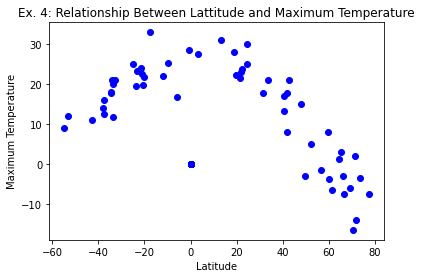

In [11]:
# Compare latitude to temperature
x_axis = dehumidified["Lat"]
y_axis = dehumidified["Temp Max"]
   
plt.title("Ex. 4: Relationship Between Lattitude and Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")

plt.scatter(x_axis, y_axis, marker="o", color="blue")

#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
#regress_values = x_axis * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.plot(x_axis,regress_values,"r-")
#plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.savefig("output_data/4chart_lat2temp.png")
plt.show()
# print(f"The correlation coefficient is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
# print(f"The line equation is as follows:  {line_eq}")

## Latitude vs. Humidity Plot

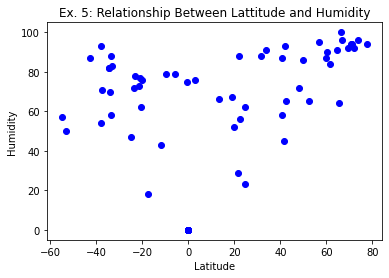

In [12]:
# Compare latitude to humidity
x_axis = dehumidified["Lat"]
y_axis = dehumidified["Humidity"]
   
plt.title("Ex. 5: Relationship Between Lattitude and Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.scatter(x_axis, y_axis, marker="o", color="blue")

#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
#regress_values = x_axis * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.plot(x_axis,regress_values,"r-")
#plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.savefig("output_data/5chart_lat2humidity.png")
plt.show()
# print(f"The correlation coefficient is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
# print(f"The line equation is as follows:  {line_eq}")

## Latitude vs. Cloudiness Plot

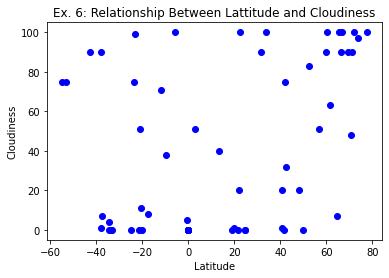

In [13]:
# Compare latitude to cloudiness
x_axis = dehumidified["Lat"]
y_axis = dehumidified["Cloudiness"]
   
plt.title("Ex. 6: Relationship Between Lattitude and Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.scatter(x_axis, y_axis, marker="o", color="blue")

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
# regress_values = x_axis * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.plot(x_axis,regress_values,"r-")
# plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.savefig("output_data/6chart_lat2cloudiness.png")
plt.show()
# print(f"The correlation coefficient is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
# print(f"The line equation is as follows:  {line_eq}")

## Latitude vs. Wind Speed Plot

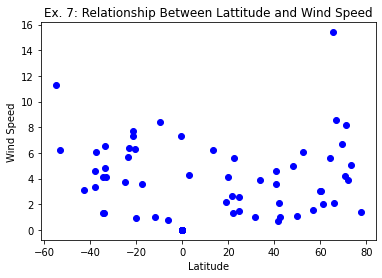

In [14]:
# Compare latitude to wind speed
x_axis = dehumidified["Lat"]
y_axis = dehumidified["Wind Speed"]
   
plt.title("Ex. 7: Relationship Between Lattitude and Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.scatter(x_axis, y_axis, marker="o", color="blue")

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
# regress_values = x_axis * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.plot(x_axis,regress_values,"r-")
# plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.savefig("output_data/7chart_lat2windspeed.png")
plt.show()
# print(f"The correlation coefficient is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
# print(f"The line equation is as follows:  {line_eq}")

## Linear Regression

In [15]:
# See above

In [16]:
# Build a northern hemisphere data frame
northern = dehumidified.loc[dehumidified["Lat"] >= 0]
print("Exhibit 8: Table of cities at or north of equator. (Note: Cities with humidity >100% removed)")
northern.to_csv("output_data/8ex_northernhemisphere.csv", index=False, header=True)
northern.head()

Exhibit 8: Table of cities at or north of equator. (Note: Cities with humidity >100% removed)


,City,Lat,Lng,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date
0,tasiilaq,65.61,-37.64,3.00,64,100,15.40,GL,1603388944
3,hilo,19.73,-155.09,22.22,52,1,4.10,US,1603388948
4,chokurdakh,70.63,147.92,-16.54,94,48,4.22,RU,1603388950
5,victoria,22.29,114.16,23.89,56,100,5.60,HK,1603388752
7,pangnirtung,66.15,-65.71,-3.00,100,90,2.10,CA,1603388954


In [17]:
# Build a southern hemisphere data frame
southern = dehumidified.loc[dehumidified["Lat"] < 0]
print("Exhibit 9: Table of cities south of equator. (Note: Cities with humidity >100% removed)")
southern.to_csv("output_data/9ex_southernhemisphere.csv", index=False, header=True)
southern.head()

Exhibit 9: Table of cities south of equator. (Note: Cities with humidity >100% removed)


,City,Lat,Lng,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date
1,antofagasta,-23.65,-70.40,19.44,72,75,5.70,CL,1603388945
2,port alfred,-33.59,26.89,19.94,88,0,6.52,ZA,1603388946
6,hobart,-42.88,147.33,11.00,87,90,3.10,AU,1603388913
8,kruisfontein,-34.00,24.73,21.11,70,0,1.34,ZA,1603388955
9,katima mulilo,-17.50,24.27,33.00,18,8,3.60,NA,1603388956


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

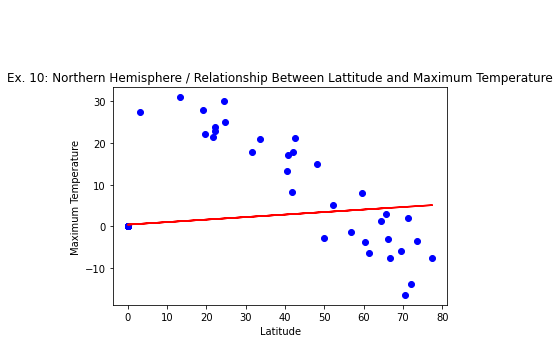

The correlation coefficient is 0.18
The line equation is as follows:  y = 0.06x + 0.37


In [18]:
#Compare latitude to temperature

x_axis = northern["Lat"]
#print(x_axis.dtype)
#print(x_axis.head())
y_axis = northern["Temp Max"]
   
plt.title("Ex. 10: Northern Hemisphere / Relationship Between Lattitude and Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")

plt.scatter(x_axis, y_axis, marker="o", color="blue")

#unable to perform regression because slope does not have a value ... 'float' object has not attribute 'shape'
#print(type(x_axis))
#print(type(y_axis))

#print(y_axis.head())
#print(linregress(x_axis.astype(float), y_axis.astype(float))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis.astype(float), y_axis.astype(float))
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.savefig("output_data/10chart_northlat2temp.png")
plt.show()
print(f"The correlation coefficient is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

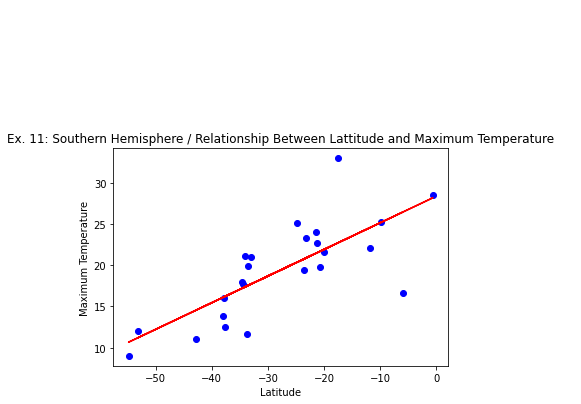

The correlation coefficient is 0.75
The line equation is as follows:  y = 0.32x + 28.39


In [19]:
# Compare latitude to temperature

x_axis = southern["Lat"]
y_axis = southern["Temp Max"]
   
plt.title("Ex. 11: Southern Hemisphere / Relationship Between Lattitude and Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")

plt.scatter(x_axis, y_axis, marker="o", color="blue")

# unable to perform regression because slope does not have a value ... 'float' object has not attribute 'shape'
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis.astype(float), y_axis.astype(float))
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("output_data/11chart_southlat2temp.png")
plt.show()

print(f"The correlation coefficient is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression